# AI for Digital Inclusion: Bridging the Gender Divide (SDG 5)

## Project Overview
This project aims to demonstrate how AI, specifically machine learning, can be used to promote digital inclusion for women in remote areas. We focus on creating an adaptive learning system that personalizes digital skills training, addressing the digital gender divide.

## UN Sustainable Development Goal (SDG)
**SDG 5: Gender Equality**
Specifically, this project targets **SDG Target 5.b**: "Enhance the use of enabling technology, in particular information and communications technology, to promote the empowerment of women."

## The Problem
Women in remote areas often face significant barriers to acquiring digital skills, including limited access to infrastructure, devices, and suitable training materials. Traditional training methods may not cater to diverse learning needs, literacy levels, or cultural contexts, perpetuating the digital gender divide.

## The Solution
We propose an AI-powered adaptive learning platform that provides personalized digital skills training. This system will leverage supervised machine learning to recommend tailored learning paths based on individual learner profiles and progress, and conceptually use NLP for accessible content and chatbot support.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # A simple, interpretable model
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [23]:
# Set a seed for reproducibility
np.random.seed(42)

# Number of simulated learners
num_learners = 1000

# Simulate features:
# Initial Digital Literacy (0-10, 0=low, 10=high)
initial_literacy = np.random.randint(0, 11, num_learners)

# Access to Smartphone (0=No, 1=Yes)
smartphone_access = np.random.choice([0, 1], num_learners, p=[0.3, 0.7]) # 70% have smartphone

# Internet Connectivity (0=Poor, 1=Moderate, 2=Good)
internet_connectivity = np.random.choice([0, 1, 2], num_learners, p=[0.2, 0.5, 0.3])

# Learning Preference (0=Visual, 1=Text-based, 2=Interactive)
learning_preference = np.random.choice([0, 1, 2], num_learners, p=[0.4, 0.3, 0.3])

# Age Group (0=<25, 1=25-45, 2=>45)
age_group = np.random.choice([0, 1, 2], num_learners, p=[0.3, 0.5, 0.2])

# Target Variable: Recommended Learning Path (0=Basic Literacy, 1=Productivity Tools, 2=Digital Marketing Basics)
# This is where our 'supervised' part comes in. We'll simulate a 'ground truth' based on features.
# A simpler learner might get 'Basic Literacy', an intermediate 'Productivity Tools', etc.
recommended_path = []
for i in range(num_learners):
    if initial_literacy[i] < 4 and internet_connectivity[i] < 1: # Low literacy AND poor internet -> Basic Literacy
        recommended_path.append(0) # Basic Literacy
    elif initial_literacy[i] >= 4 and initial_literacy[i] < 7 and smartphone_access[i] == 1: # Moderate literacy & has smartphone -> Productivity Tools
        recommended_path.append(1) # Productivity Tools
    else: # Higher literacy or other conditions -> Digital Marketing Basics
        recommended_path.append(2) # Digital Marketing Basics (assuming higher skill)

# Convert to DataFrame
data = pd.DataFrame({
    'initial_literacy': initial_literacy,
    'smartphone_access': smartphone_access,
    'internet_connectivity': internet_connectivity,
    'learning_preference': learning_preference,
    'age_group': age_group,
    'recommended_path': recommended_path
})

print("Simulated Dataset Head:")
print(data.head())
print("\nDataset Info:")
data.info()
print("\nValue Counts for Recommended Path:")
print(data['recommended_path'].value_counts())

Simulated Dataset Head:
   initial_literacy  smartphone_access  internet_connectivity  \
0                 6                  1                      1   
1                 3                  1                      1   
2                10                  1                      2   
3                 7                  1                      2   
4                 4                  1                      2   

   learning_preference  age_group  recommended_path  
0                    2          1                 1  
1                    0          1                 2  
2                    0          2                 2  
3                    0          2                 2  
4                    0          1                 1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   initial_literacy       1000 non-null

In [24]:
# Define features (X) and target (y)
X = data[['initial_literacy', 'smartphone_access', 'internet_connectivity', 'learning_preference', 'age_group']]
y = data['recommended_path']

# Split data into training and testing sets
# We'll use 80% for training and 20% for testing
# stratify=y ensures that the proportions of the different learning paths are similar in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train value counts:\n{y_train.value_counts()}")
print(f"y_test value counts:\n{y_test.value_counts()}")

X_train shape: (800, 5)
X_test shape: (200, 5)
y_train value counts:
recommended_path
2    590
1    155
0     55
Name: count, dtype: int64
y_test value counts:
recommended_path
2    148
1     38
0     14
Name: count, dtype: int64


In [25]:
# Initialize the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete!")

Training the model...
Model training complete!


## Ethical Reflection

### Bias in Data
Our simulated dataset aims to represent various learner characteristics but is a simplification of real-world complexities. In a real-world scenario, bias could arise from:
* **Sampling Bias:** If data is collected only from certain regions or demographics, the model might not generalize well to truly remote or marginalized populations.
* **Historical Bias:** If past training program data reflects existing inequalities (e.g., fewer resources for women in certain areas), the model could inadvertently perpetuate these disparities by recommending less advanced paths to certain groups.
* **Feature Bias:** Features might not capture crucial socio-economic factors or cultural nuances impacting learning.

**Mitigation Strategies:**
* **Diverse Data Collection:** Actively seek data from various remote regions and ensure representation across all relevant demographics (age, literacy levels, disability, etc.).
* **Fairness Metrics:** Implement fairness metrics during model evaluation to ensure performance is equitable across different demographic groups.
* **Interpretable Models:** Use interpretable models (like Decision Trees) to understand *why* certain recommendations are made, allowing for human oversight and adjustment.
* **Continuous Feedback Loops:** Implement mechanisms for learner feedback to identify and correct biases in recommendations.

### Promoting Fairness and Sustainability
* **Fairness:** The personalized approach aims to promote fairness by tailoring education to individual needs, preventing a one-size-all approach that often disadvantages marginalized groups. By recommending appropriate learning paths, we ensure learners are neither overwhelmed nor undertaught.
* **Accessibility First:** The design prioritizes low-bandwidth solutions, offline capabilities (if applicable), and multiple content formats (audio, visual, simplified text) to ensure access for women with limited connectivity or literacy.
* **Empowerment Focus:** The ultimate goal is not just skill acquisition but economic and social empowerment. The recommended paths should lead to tangible opportunities for women in digital business or other beneficial digital engagements.
* **Community Integration:** Encourage community-based learning hubs or local facilitators who can supplement the AI-driven training with human support and context-specific guidance, ensuring sustainability beyond technology.

# AI for Digital Inclusion: Bridging the Gender Divide (SDG 5)

## Project Overview
This project aims to demonstrate how AI, specifically machine learning, can be used to promote digital inclusion for women in remote areas. We focus on creating an adaptive learning system that personalizes digital skills training, addressing the digital gender divide.

## UN Sustainable Development Goal (SDG)
**SDG 5: Gender Equality**
Specifically, this project targets **SDG Target 5.b**: "Enhance the use of enabling technology, in particular information and communications technology, to promote the empowerment of women."

## The Problem
Women in remote areas often face significant barriers to acquiring digital skills, including limited access to infrastructure, devices, and suitable training materials. Traditional training methods may not cater to diverse learning needs, literacy levels, or cultural contexts, perpetuating the digital gender divide.

## The Solution
We propose an AI-powered adaptive learning platform that provides personalized digital skills training. This system will leverage supervised machine learning to recommend tailored learning paths based on individual learner profiles and progress, and conceptually use NLP for accessible content and chatbot support.

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # A simple, interpretable model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Added confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [27]:
# Set a seed for reproducibility
np.random.seed(42)

# Number of simulated learners
num_learners = 1000

# Simulate features:
# Initial Digital Literacy (0-10, 0=low, 10=high)
initial_literacy = np.random.randint(0, 11, num_learners)

# Access to Smartphone (0=No, 1=Yes)
smartphone_access = np.random.choice([0, 1], num_learners, p=[0.3, 0.7]) # 70% have smartphone

# Internet Connectivity (0=Poor, 1=Moderate, 2=Good)
internet_connectivity = np.random.choice([0, 1, 2], num_learners, p=[0.2, 0.5, 0.3])

# Learning Preference (0=Visual, 1=Text-based, 2=Interactive)
learning_preference = np.random.choice([0, 1, 2], num_learners, p=[0.4, 0.3, 0.3])

# Age Group (0=<25, 1=25-45, 2=>45)
age_group = np.random.choice([0, 1, 2], num_learners, p=[0.3, 0.5, 0.2])

# Target Variable: Recommended Learning Path (0=Basic Literacy, 1=Productivity Tools, 2=Digital Marketing Basics)
# This is where our 'supervised' part comes in. We'll simulate a 'ground truth' based on features.
# A simpler learner might get 'Basic Literacy', an intermediate 'Productivity Tools', etc.
recommended_path = []
for i in range(num_learners):
    if initial_literacy[i] < 4 and internet_connectivity[i] < 1: # Low literacy AND poor internet -> Basic Literacy
        recommended_path.append(0) # Basic Literacy (e.g., how to use a smartphone, basic internet concepts)
    elif initial_literacy[i] >= 4 and initial_literacy[i] < 7 and smartphone_access[i] == 1: # Moderate literacy & has smartphone -> Productivity Tools
        recommended_path.append(1) # Productivity Tools (e.g., mobile apps for finance, communication)
    else: # Higher literacy or other conditions -> Digital Marketing Basics
        recommended_path.append(2) # Digital Marketing Basics (e.g., using social media for business, online selling)

# Convert to DataFrame
data = pd.DataFrame({
    'initial_literacy': initial_literacy,
    'smartphone_access': smartphone_access,
    'internet_connectivity': internet_connectivity,
    'learning_preference': learning_preference,
    'age_group': age_group,
    'recommended_path': recommended_path
})

print("Simulated Dataset Head:")
print(data.head())
print("\nDataset Info:")
data.info()
print("\nValue Counts for Recommended Path:")
print(data['recommended_path'].value_counts())

Simulated Dataset Head:
   initial_literacy  smartphone_access  internet_connectivity  \
0                 6                  1                      1   
1                 3                  1                      1   
2                10                  1                      2   
3                 7                  1                      2   
4                 4                  1                      2   

   learning_preference  age_group  recommended_path  
0                    2          1                 1  
1                    0          1                 2  
2                    0          2                 2  
3                    0          2                 2  
4                    0          1                 1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   initial_literacy       1000 non-null

In [28]:
# Define features (X) and target (y)
X = data[['initial_literacy', 'smartphone_access', 'internet_connectivity', 'learning_preference', 'age_group']]
y = data['recommended_path']

# Split data into training and testing sets
# We'll use 80% for training and 20% for testing
# stratify=y ensures that the proportions of the different learning paths are similar in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train value counts:\n{y_train.value_counts()}")
print(f"y_test value counts:\n{y_test.value_counts()}")

X_train shape: (800, 5)
X_test shape: (200, 5)
y_train value counts:
recommended_path
2    590
1    155
0     55
Name: count, dtype: int64
y_test value counts:
recommended_path
2    148
1     38
0     14
Name: count, dtype: int64


In [29]:
# Initialize the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete!")

Training the model...
Model training complete!



Model Accuracy: 1.00



Classification Report:
                          precision    recall  f1-score   support

          Basic Literacy       1.00      1.00      1.00        14
      Productivity Tools       1.00      1.00      1.00        38
Digital Marketing Basics       1.00      1.00      1.00       148

                accuracy                           1.00       200
               macro avg       1.00      1.00      1.00       200
            weighted avg       1.00      1.00      1.00       200



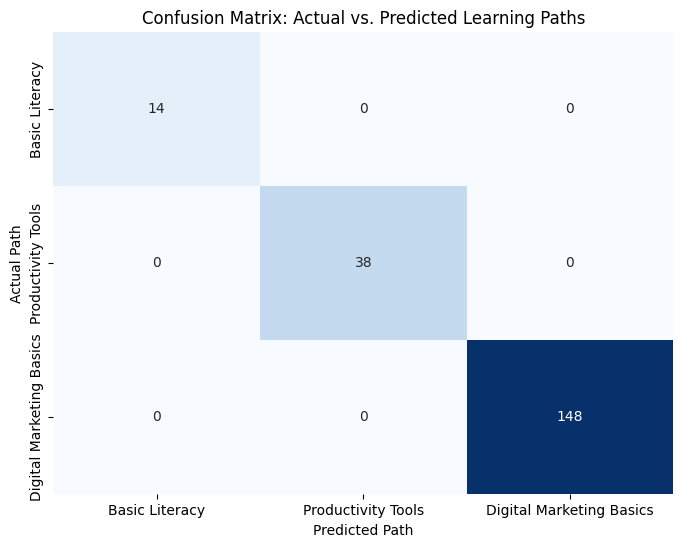

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Define target names for better readability in the report and plot
target_names = ['Basic Literacy', 'Productivity Tools', 'Digital Marketing Basics']

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_names)

print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

# Quick visualization of actual vs predicted (Confusion Matrix)
plt.figure(figsize=(8, 6))
# Create a DataFrame for the confusion matrix with proper labels
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=target_names, columns=target_names)
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False) # cbar=False makes it cleaner for simple cases
plt.title('Confusion Matrix: Actual vs. Predicted Learning Paths')
plt.xlabel('Predicted Path')
plt.ylabel('Actual Path')
plt.show()

## Ethical Reflection

### Bias in Data
Our simulated dataset aims to represent various learner characteristics but is a simplification of real-world complexities. In a real-world scenario, bias could arise from:
* **Sampling Bias:** If data is collected only from certain regions or demographics, the model might not generalize well to truly remote or marginalized populations.
* **Historical Bias:** If past training program data reflects existing inequalities (e.g., fewer resources for women in certain areas), the model could inadvertently perpetuate these disparities by recommending less advanced paths to certain groups.
* **Feature Bias:** Features might not capture crucial socio-economic factors or cultural nuances impacting learning.

**Mitigation Strategies:**
* **Diverse Data Collection:** Actively seek data from various remote regions and ensure representation across all relevant demographics (age, literacy levels, disability, etc.).
* **Fairness Metrics:** Implement fairness metrics during model evaluation to ensure performance is equitable across different demographic groups.
* **Interpretable Models:** Use interpretable models (like Decision Trees) to understand *why* certain recommendations are made, allowing for human oversight and adjustment.
* **Continuous Feedback Loops:** Implement mechanisms for learner feedback to identify and correct biases in recommendations.

### Promoting Fairness and Sustainability
* **Fairness:** The personalized approach aims to promote fairness by tailoring education to individual needs, preventing a one-size-all approach that often disadvantages marginalized groups. By recommending appropriate learning paths, we ensure learners are neither overwhelmed nor undertaught.
* **Accessibility First:** The design prioritizes low-bandwidth solutions, offline capabilities (if applicable), and multiple content formats (audio, visual, simplified text) to ensure access for women with limited connectivity or literacy.
* **Empowerment Focus:** The ultimate goal is not just skill acquisition but economic and social empowerment. The recommended paths should lead to tangible opportunities for women in digital business or other beneficial digital engagements.
* **Community Integration:** Encourage community-based learning hubs or local facilitators who can supplement the AI-driven training with human support and context-specific guidance, ensuring sustainability beyond technology.